# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [372]:
!python -m pip install kaggle==1.6.12

In [ ]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


There are many factors that cause pollution. However, there are still some factors that are questionable about whether they are real factors of pollution or not. One debatable factor of pollution is population. The project will be addressing the following research question: **Is population a valid factor of pollution?**

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

**_Type_**: CSV File

**_Method_**: The data was gathered using the **"_Downloading data manually_"** method from the **"edit_AIR QUALITY INDEX (by cities) - IQAir"** CSV file.

The method of **"_Downloading data manually_"** was used to gather the data from the first dataset because it is the simplest and easiest method to use to gather data from a dataset while keeping an original and edited version of the dataset out of all five methods. The method requires the file of the dataset to be downloaded into the location where all the project files are being held first. Finally, only one line of code is used to read and access the data from the file of the dataset. This shows that the method of **"_Downloading data manually_"** is the simplest and easiest method out of all five methods.  

**_Dataset variables_**:

*   *_**"2019"**_: Air Quality Index (AQI) values for measuring Pollution during 2019*
*   *_**"City"**_: Both Country and City names*

The **"2019"** column is needed because it contains the air quality index values that measure the pollution of different cities during 2019. The air quality index values during 2019 are the only air quality index values that can be shared with the other dataset because the other dataset only has values from 2019. These values are also needed to answer the research question since they have values of pollution.

The **"City"** column is needed because the data in the column will be used to merge the two datasets together after the **city** names are put into a new column that is separate from the column containing the **country** names.

The rest of the columns containing _rank_ and the air quality index values for each year from _2017_ to _2021_, except _2019_, are not needed to answer the research question.

In [1725]:
#FILL IN 1st data gathering and loading method
import pandas as pd
import numpy as np

df_polluted_cities_and_countries = pd.read_csv("edit_AIR QUALITY INDEX (by cities) - IQAir.csv") # loads CSV file of first dataset
df_polluted_cities_and_countries # displays first dataset

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
0,1,"Bhiwadi, India",106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,-
1,2,"Ghaziabad, India",102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163,106.6,110.2,135.2,144.6
2,3,"Hotan, China",101.5,-,-,158,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116,91.9
3,4,"Delhi, India",96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,"Jaunpur, India",95.3,182.2,143.5,91,70,51.1,40.7,33.5,34.2,36.8,75.7,196,195.7,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6470,6471,"Mornington, Australia",2.4,2,1.9,2.3,2.1,3.2,3.6,4.3,2.1,2.1,1.7,2,1.9,3.2,3.8,3,3.9
6471,6472,"Emu River, Australia",2.1,1.9,1.8,2,2.6,3.4,2.6,1.9,2.1,2.2,1.5,1.4,1.5,2.6,2.5,2.6,2.3
6472,6473,"Judbury, Australia",2.0,1.6,1.5,2.1,1.5,4.1,2,2.2,2.2,1.7,1.5,1.4,1.7,2.4,5.7,2.2,1.9
6473,6474,"St Helens, Australia",1.9,1.8,2.1,2,2.4,2.7,1.6,1.6,1.6,1.9,1.6,2.4,1.6,2.4,2.4,2.9,3.3


#### **Dataset 2**

**_Type_**: CSV File

**_Method_**: The data was gathered using the **"_Programmatically download files_"** method from the **"worldcities"** CSV file.

The method of **"_Programmatically download files_"** was used to gather the data from the second dataset because it is the next simplest and easiest method to use to gather data from a dataset 
out of all five methods. The method first requires the following import to be included in the jupyter notebook file: **import zipfile**. Next, the zip file of the dataset needs to be downloaded into the location where all the project files are being held. Next, two lines of code are used to unzip the zip file in read mode. Finally, the data from the file of the second dataset in the zip file is accessed using the same gathering method used for the first dataset, except the directory for the CSV file is used in the gethering method instead of the CSV file name. This shows that the method of **"_Programmatically download files_"** is the next simplest and easiest method out of all five methods.

**_Dataset variables_**:

*   *_**"population"**_: Populations of cities within countries during 2019*
*   *_**"city"**_: City names*
*   *_**"country"**_: Country names*

The **"population"** column is needed because it contains the city populations during 2019. This population data can be shared with the other dataset because the other dataset has values covering from 2017 to 2021. The populations during 2019 are within the time range. The population data is also needed to answer the research question since the research question requires information about the city populations.

The **"city"** and **"country"** columns are needed because the data in the columns will be used to merge the two datasets together.

The rest of the columns containing the _city ASCII string_, _city latitude_, _city longitude_, _alpha-2 country code_, _alpha-3 country code_, _city admin name_, and country's _capital_ are not needed to answer the research question.

In [1726]:
#FILL IN 2nd data gathering and loading method
import zipfile

with zipfile.ZipFile("worldcities.zip", "r") as zip_ref: # opens zip file in read mode
    zip_ref.extractall("worldcities/") # extracts all data in zip file

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [1727]:
#Optional: store the raw data in your local data store
df_world_cities_dataset = pd.read_csv("worldcities/worldcities.csv") # loads CSV file of second dataset
df_world_cities_dataset # displays second dataset

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
15488,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
15489,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
15490,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159
15491,Nordvik,Nordvik,74.0165,111.5100,Russia,RU,RUS,Krasnoyarskiy Kray,NaN,0.0,1643587468


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

#### First Dataset

In [1728]:
#FILL IN - Inspecting the dataframe visually
df_polluted_cities_and_countries.iloc[[6233, 6372]] # displays rows 6233 and 6372 of first dataset

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
6233,6234,"The Bottom, Bonaire, Saint Eustatius and Saba",5.1,2.6,3.2,2.6,5.7,4.6,4.9,6.2,6.4,4.4,12.6,2.8,3.1,-,-,-,-
6372,6373,"Hafnarfjoerdur, Iceland",4.4,5.5,3.8,3.4,5.1,5.5,4.6,5.8,5.9,3.8,3.4,2.9,3,4.3,4.3,4.3,5.9


In [1729]:
#FILL IN - Inspecting the dataframe programmatically
print("Misspelled City Names:\n")

first_misspelled_city_name = df_polluted_cities_and_countries.loc[6233, 'City'] # finds first misspelled city name
print('1.', first_misspelled_city_name, '\n') # displays first misspelled city name
second_misspelled_city_name = df_polluted_cities_and_countries.loc[6372, 'City'] # finds second misspelled city name
print('2.',second_misspelled_city_name) # displays second misspelled city name

Misspelled City Names:

1. The Bottom, Bonaire, Saint Eustatius and Saba 

2. Hafnarfjoerdur, Iceland


**_Issue:_** In the **"City"** column, the city name, **The Bottom, Bonaire, Saint Eustatius and Saba**, is supposed to be spelled as **The Bottom, Bonaire, Sint Eustatius and Saba** and the city name, **Hafnarfjoerdur, Iceland**, is supposed to be spelled as **Hafnarfjordur, Iceland**. This makes the data of the two city names in the first dataset inaccurate.

The inaccurate data will possibly prevent the two cities from being merged with their population when the datasets are merged together to answer the research question.

**_Justification for Visual Method:_** The main purpose of the visual method is to display raw data from rows _6233_ and _6372_ to show that the city names, **The Bottom, Bonaire, Saint Eustatius and Saba** and **Hafnarfjoerdur, Iceland**, are inaccurate values.

**_Justification for Programmatic Method:_** The main purpose of the programmatic method is to display the city names, **The Bottom, Bonaire, Saint Eustatius and Saba** and **Hafnarfjoerdur, Iceland**, to show that they are inaccurate values.

#### Second Dataset

In [1730]:
#FILL IN - Inspecting the dataframe visually
df_world_cities_dataset.head() # displays first 5 rows of raw data

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [1731]:
#FILL IN - Inspecting the dataframe programmatically
Transposed_df_world_cities_dataset = df_world_cities_dataset.T # turns columns into rows and rows into columns in copy of transposed second dataset
duplicate_cols_in_world_cities_dataset = Transposed_df_world_cities_dataset.duplicated() # finds duplicated columns in second dataset
duplicates_in_world_cities_dataset = Transposed_df_world_cities_dataset[duplicate_cols_in_world_cities_dataset] # displays duplicate columns in second dataset
df_world_cities_dataset[['city', 'city_ascii']] # displays raw data in "city" and "city_ascii" columns of "df_world_cities_dataset" dataframe

,city,city_ascii
0,Tokyo,Tokyo
1,New York,New York
2,Mexico City,Mexico City
3,Mumbai,Mumbai
4,São Paulo,Sao Paulo
...,...,...
15488,Timmiarmiut,Timmiarmiut
15489,Cheremoshna,Cheremoshna
15490,Ambarchik,Ambarchik
15491,Nordvik,Nordvik


**_Issue:_** The column called **"city_ascii"** is a duplicate column of the **"city"** column because it contains the same data as the **"city"** column, despite the accents in some of the letters in some of the city names.
	
The unnecessary data from the **"city_ascii"** column will take up space in the dataset and increase the amount of data to analyze through. However, it will not affect the analysis for the research question because the data in the **"city_ascii"** column is the exact same as the data in the **"city"** column. Therefore, it will not affect the merging of the two datasets and the analysis.

**_Justification for Visual Method:_** The main purpose of the visual method is to display the first five rows of raw data from the **"city"** and **"city_ascii"** columns to prove that the **"city_ascii"** column is a duplicate column of the **"city"** column, despite the accents in some of the letters in some of the city names.

**_Justification for Programmatic Method:_** The purpose of the programmatic method is to find the duplicate columns and show the raw data from the **"city"** and **"city_ascii"** columns to prove that the **"city_ascii"** column is a duplicate column of the **"city"** column, despite the accents in some of the letters in some of the city names.

### Quality Issue 2:

#### First Dataset

In [1732]:
#FILL IN - Inspecting the dataframe visually
df_polluted_cities_and_countries.iloc[[22, 32, 50, 109, 170, 179, 201, 210, 311, 410, 606, 1568, 4673]] # displays rows 23, 33, 51, 110, 171, 180, 202, 211, 312, 411, 607, 1569, and 4674 of first dataset

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
22,23,"Sahiwal, Pakistan",81.7,83.7,116.2,83.1,58.4,50.1,50.3,53.9,62.9,71,104.4,275,-,-,-,-,-
32,33,"Amroha, India",75.0,-,-,105.1,76.9,58.3,48.5,41.6,41.3,36,89.6,156.3,125,-,-,-,-
50,51,"Siddharthanagar, Nepal",64.7,149.6,151.7,80.7,85,32.4,23.5,18.8,21,22.7,-,-,81.8,-,-,-,-
109,110,"Angol, Chile",47.7,7.2,7,3.2,-,56.2,125.3,89.9,67.8,52.9,22.1,8.8,12,-,-,-,-
170,171,"Yanta, China",43.2,108.2,-,-,40.4,44.1,33.8,23,29.5,24.6,54.7,62.8,58.7,-,-,-,-
179,180,"Laktasi, Bosnia Herzegovina",42.8,72.8,66.7,47.2,37.3,17.1,22.4,-,15.3,21.2,50.1,57.3,53.4,-,-,-,-
201,202,"Qingnian, China",42.0,122.2,-,-,41,42.3,31.7,23.6,28.8,22.7,49.6,61.5,63.7,-,-,-,-
210,211,"Juye, China",41.1,-,-,-,40.8,40.1,27.3,17.4,24,19.6,52.7,65.7,70.5,-,-,-,-
311,312,"Kosjeric, Serbia",35.5,55.5,48.5,40.7,25.9,16,13,-,11.6,14.7,33.4,53.7,55.7,36.7,28.8,-,-
410,411,"Uzice, Serbia",32.1,46.7,43.2,40.4,24.3,8.1,12.8,13.4,7.6,-,35.7,62.6,57.3,31.7,-,-,-


In [1733]:
#FILL IN - Inspecting the dataframe programmatically

df_polluted_cities_and_countries.replace('-', np.nan, inplace=True, regex=False) # replaces '-' with null values (MUST USE "regex=False" or names with '-' in "City" column will be changed into null values) ("regex=False" makes case-insensitive) (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)
df_polluted_cities_and_countries.isnull().sum() # displays amount of null values in each column of "df_polluted_cities_and_countries" dataframe

Rank            0
City            0
2021            0
JAN(2021)     671
FEB(2021)     574
MAR(2021)     193
APR(2021)     256
MAY(2021)      16
JUN(2021)      16
JUL(2021)      22
AUG(2021)       9
SEP(2021)      17
OCT(2021)      26
NOV(2021)      43
DEC(2021)      87
2020         2207
2019         2422
2018         3999
2017         4194
dtype: int64

**_Issue:_** The following columns in the first dataset have missing values: **"JAN(2021)"**, **"FEB(2021)"**, **"MAR(2021)"**, **"APR(2021)"**, **"MAY(2021)"**, **"JUN(2021)"**, **"JUL(2021)"**, **"AUG(2021)"**, **"SEP(2021)"**, **"OCT(2021)"**, **"NOV(2021)"**, **"DEC(2021)"**, **"2020"**, **"2019"**, **"2018"**, and **"2017"**.

The missing data in the **"2019"** column will leave some of the cities' pollution amounts unknown. This will possibly cause some of the most polluted cities to be unaccounted for when answering the research question.

The missing data in the following columns will not affect the analysis for the research question because they are not needed for answering the research question: **"JAN(2021)"**, **"FEB(2021)"**, **"MAR(2021)"**, **"APR(2021)"**, **"MAY(2021)"**, **"JUN(2021)"**, **"JUL(2021)"**, **"AUG(2021)"**, **"SEP(2021)"**, **"OCT(2021)"**, **"NOV(2021)"**, **"DEC(2021)"**, **"2020"**, **"2018"**, and **"2017"**.

**_Justification for Visual Method:_** The purpose of the visual method is to display raw data from rows _23_, _33_, _51_, _110_, _171_, _180_, _202_, _211_, _312_, _411_, _607_, _1569_, and _4674_ to show that there are missing values in the following columns: **"JAN(2021)"**, **"FEB(2021)"**, **"MAR(2021)"**, **"APR(2021)"**, **"MAY(2021)"**, **"JUN(2021)"**, **"JUL(2021)"**, **"AUG(2021)"**, **"SEP(2021)"**, **"OCT(2021)"**, **"NOV(2021)"**, **"DEC(2021)"**, **"2020"**, **"2018"**, and **"2017"**.

**_Justification for Programmatic Method:_** In the programmatic method, the purpose of the code that uses **.replace()** is to find the data values that are dashes and replace them with null values to show that they were missing values. The purpose of the code that uses **.isnull()** is to display the amount of missing values in each column of the first dataset.

#### Second Dataset

In [1734]:
#FILL IN - Inspecting the dataframe visually
df_world_cities_dataset.iloc[[1, 8, 24, 32, 53, 424, 548, 600, 601, 602, 3780, 4357]] # displays rows 1, 8, 24, 32, 53, 424, 548, 600, 601, 602, 3780, and 4357 of second dataset

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
8,Los Angeles,Los Angeles,34.1139,-118.4068,United States,US,USA,California,NaN,12815475.0,1840020491
24,Chicago,Chicago,41.8373,-87.6862,United States,US,USA,Illinois,NaN,8675982.0,1840000494
32,Hong Kong,Hong Kong,22.3050,114.1850,Hong Kong,HK,HKG,NaN,NaN,7206000.0,1344982653
53,Singapore,Singapore,1.2930,103.8558,Singapore,SG,SGP,NaN,primary,5183700.0,1702341327
424,Namp’o,Namp'o,38.7669,125.4524,"Korea, North",KP,PRK,NaN,admin,1127000.0,1408892768
548,Windhoek,Windhoek,-22.5700,17.0835,Namibia,NaN,NAM,Khomas,primary,268132.0,1516802003
600,Al Quds,Al Quds,31.7764,35.2269,West Bank,XW,XWB,NaN,primary,NaN,1934000006
601,Philipsburg,Philipsburg,18.0255,-63.0450,Sint Maarten,SX,SXM,NaN,primary,NaN,1534859858
602,Gitega,Gitega,-3.4271,29.9246,Burundi,BI,BDI,Gitega,primary,NaN,1108778000


In [1735]:
#FILL IN - Inspecting the dataframe programmatically
df_world_cities_dataset.isnull().sum() # displays amount of null values in each column of "df_world_cities_dataset" dataframe

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             31
iso3              0
admin_name      191
capital       10247
population     1685
id                0
dtype: int64

**_Issue:_**  The following columns have missing values: **"iso2"**, **"admin_name"**, **"capital"**, and **"population"**.

The missing values in the **"population"** column will leave some of the cities' population amounts unknown. This will possibly cause some of the most populated cities to be unaccounted for when answering the research question.

The missing values in the **"admin_name"** and **"capital"** columns will not affect the analysis for the research question because the data in those columns are not needed to answer the research question.

**_Justification for Visual Method:_** The main purpose of the visual method is to display raw data from rows _1_, _8_, _24_, _32_, _53_, _424_, _548_, _600_, _601_, _602_, _3780_, and _4357_ to show that there are missing values in the following columns: **"iso2"**, **"admin_name"**, **"capital"**, and **"population"**.

**_Justification for Programmatic Method:_** The main purpose of the visual method is to find and display the amount of null values in each column of the second dataset.

### Tidiness Issue 1:

#### First Dataset

In [1736]:
#FILL IN - Inspecting the dataframe visually
df_polluted_cities_and_countries.head() # displays first 5 rows of raw data

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
0,1,"Bhiwadi, India",106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,NaN
1,2,"Ghaziabad, India",102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163,106.6,110.2,135.2,144.6
2,3,"Hotan, China",101.5,NaN,NaN,158,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116,91.9
3,4,"Delhi, India",96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,"Jaunpur, India",95.3,182.2,143.5,91,70,51.1,40.7,33.5,34.2,36.8,75.7,196,195.7,NaN,NaN,NaN,NaN


In [1737]:
#FILL IN - Inspecting the dataframe programmatically
df_polluted_cities_and_countries.columns # displays column names of "df_polluted_cities_and_countries" dataframe

Index(['Rank', 'City', '2021', 'JAN(2021)', 'FEB(2021)', 'MAR(2021)',
       'APR(2021)', 'MAY(2021)', 'JUN(2021)', 'JUL(2021)', 'AUG(2021)',
       'SEP(2021)', 'OCT(2021)', 'NOV(2021)', 'DEC(2021)', '2020', '2019',
       '2018', '2017'],
      dtype='object')

**_Issue:_** The data in the following columns should be in a separate table because they contain air quality index values for each month of year 2021 instead of one whole year like the other columns holding air quality index values: **"JAN(2021)"**, **"FEB(2021)"**, **"MAR(2021)"**, **"APR(2021)"**, **"MAY(2021)"**, **"JUN(2021)"**, **"JUL(2021)"**, **"AUG(2021)"**, **"SEP(2021)"**, **"OCT(2021)"**, **"NOV(2021)"**, and **"DEC(2021)"**.

This violates the _third data tidiness rule_: **Each type of observational unit forms a table**.
	
The contrasting data will not affect the analysis for the research question because it is not needed for answering the research question.

**_Justification for Visual Method:_** The main purpose of the visual method is to display all of the column names of the first dataset to show that the **"JAN(2021)"**, **"FEB(2021)"**, **"MAR(2021)"**, **"APR(2021)"**, **"MAY(2021)"**, **"JUN(2021)"**, **"JUL(2021)"**, **"AUG(2021)"**, **"SEP(2021)"**, **"OCT(2021)"**, **"NOV(2021)"**, and **"DEC(2021)"** columns hold data from the months during 2021, whereas the columns **"2021"**, **"2020"**, **"2019"**, **"2018"**, and **"2017"** hold data for their column year.

**_Justification for Programmatic Method:_** The main purpose of the programmatic method is to display all of the column names of the first dataset to show that the **"JAN(2021)"**, **"FEB(2021)"**, **"MAR(2021)"**, **"APR(2021)"**, **"MAY(2021)"**, **"JUN(2021)"**, **"JUL(2021)"**, **"AUG(2021)"**, **"SEP(2021)"**, **"OCT(2021)"**, **"NOV(2021)"**, and **"DEC(2021)"** columns are the only columns that hold data from the months during 2021, whereas the columns **"2021"**, **"2020"**, **"2019"**, **"2018"**, and **"2017"** hold data for their column year.

#### Second Dataset

In [1738]:
#FILL IN - Inspecting the dataframe visually
df_world_cities_dataset.head() # displays first 5 rows of raw data

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [1739]:
#FILL IN - Inspecting the dataframe programmatically
df_world_cities_dataset.head(10) # displays column names and their corresponding data for first 10 rows of "df_world_cities_dataset" dataframe

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
5,Delhi,Delhi,28.6700,77.2300,India,IN,IND,Delhi,admin,15926000.0,1356872604
6,Shanghai,Shanghai,31.2165,121.4365,China,CN,CHN,Shanghai,admin,14987000.0,1156073548
7,Kolkata,Kolkata,22.4950,88.3247,India,IN,IND,West Bengal,admin,14787000.0,1356060520
8,Los Angeles,Los Angeles,34.1139,-118.4068,United States,US,USA,California,NaN,12815475.0,1840020491
9,Dhaka,Dhaka,23.7231,90.4086,Bangladesh,BD,BGD,Dhaka,primary,12797394.0,1050529279


**_Issue:_** The **"capital"** column should be in a separate table because it is not a demographic detail of the cities like the rest of the columns in the dataset. 

This violates the _third data tidiness rule_: **Each type of observational unit forms a table**.

The contrasting data will not affect the analysis for the research question because it is not needed for answering the research question.

**_Justification for Visual Method:_** The main purpose of the visual method is to display all of the column names and their corresponding data for the first five rows of the second dataset to show that the **"capital"** column should be in a separate table because it is not a demographic detail of the cities like the rest of the columns in the dataset. 

**_Justification for Programmatic Method:_** The main purpose of the visual method is to display all of the column names and their corresponding data for the first ten rows of the second dataset to show that the **"capital"** column should be in a separate table because it is not a demographic detail of the cities like the rest of the columns in the dataset.

### Tidiness Issue 2: 

#### First Dataset

In [1740]:
#FILL IN - Inspecting the dataframe visually
df_polluted_cities_and_countries.head() # displays first 5 rows of raw data

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
0,1,"Bhiwadi, India",106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,NaN
1,2,"Ghaziabad, India",102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163,106.6,110.2,135.2,144.6
2,3,"Hotan, China",101.5,NaN,NaN,158,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116,91.9
3,4,"Delhi, India",96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,"Jaunpur, India",95.3,182.2,143.5,91,70,51.1,40.7,33.5,34.2,36.8,75.7,196,195.7,NaN,NaN,NaN,NaN


In [1741]:
#FILL IN - Inspecting the dataframe programmatically
df_polluted_cities_and_countries[["City"]] # displays raw data in "City" column of "df_polluted_cities_and_countries" dataframe

,City
0,"Bhiwadi, India"
1,"Ghaziabad, India"
2,"Hotan, China"
3,"Delhi, India"
4,"Jaunpur, India"
...,...
6470,"Mornington, Australia"
6471,"Emu River, Australia"
6472,"Judbury, Australia"
6473,"St Helens, Australia"


**_Issue:_** The column named **"City"** contains both the _country_ and **city** names when it should only contain the _country_ names. 

This violates the _first data tidiness rule_: **Each variable forms a column**. 

The column will prevent the first and second datasets from being merged together because the **"City"** must only contain **city** names in order to merge the two datasets.

**_Justification for Visual Method:_** The main purpose of the visual method is to display the first five rows of raw data from the **"City"** column to show the column contains both the _country_ and **city** names when it should only contain the _country_ names.

**_Justification for Programmatic Method:_** The main purpose of the programmatic method is to display data in **"City"** column to show the column contains both the _country_ and **city** names when it should only contain the _country_ names.

#### Second Dataset

In [1742]:
#FILL IN - Inspecting the dataframe visually
df_polluted_cities_and_countries.head() # displays first 5 rows of raw data in first dataset

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
0,1,"Bhiwadi, India",106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,NaN
1,2,"Ghaziabad, India",102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163,106.6,110.2,135.2,144.6
2,3,"Hotan, China",101.5,NaN,NaN,158,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116,91.9
3,4,"Delhi, India",96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,"Jaunpur, India",95.3,182.2,143.5,91,70,51.1,40.7,33.5,34.2,36.8,75.7,196,195.7,NaN,NaN,NaN,NaN


In [1743]:
#FILL IN - Inspecting the dataframe visually
df_world_cities_dataset.head() # displays first 5 rows of raw data in second dataset

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [1744]:
#FILL IN - Inspecting the dataframe programmatically
df_polluted_cities_and_countries.head(10) # displays first 10 rows of raw data in first dataset

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
0,1,"Bhiwadi, India",106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,NaN
1,2,"Ghaziabad, India",102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163,106.6,110.2,135.2,144.6
2,3,"Hotan, China",101.5,NaN,NaN,158,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116,91.9
3,4,"Delhi, India",96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,"Jaunpur, India",95.3,182.2,143.5,91,70,51.1,40.7,33.5,34.2,36.8,75.7,196,195.7,NaN,NaN,NaN,NaN
5,6,"Faisalabad, Pakistan",94.2,207.1,118,71.2,44.6,51.2,44.7,50.4,50,51.9,NaN,234.5,241.7,73.2,104.6,130.4,NaN
6,7,"Noida, India",91.4,185.3,143.4,80.5,68.2,48,43.8,33.9,35,26.5,76.9,204.4,154.8,94.3,97.7,123.6,134
7,8,"Bahawalpur, Pakistan",91.0,173.9,145.1,77.3,51.4,45.2,54.4,42.2,43.7,38.2,67.2,197,221.2,78.7,NaN,NaN,NaN
8,9,"Peshawar, Pakistan",89.6,103.9,137.2,59.6,48,49.2,68.5,54.3,55.8,60.8,77.5,182.3,176.9,NaN,63.9,NaN,NaN
9,10,"Bagpat, India",89.1,146.1,106.3,88.3,87.1,65.7,53.9,32.8,31.5,24.3,84.7,213.6,128.1,NaN,88.6,NaN,NaN


In [1745]:
#FILL IN - Inspecting the dataframe programmatically
df_world_cities_dataset.head(10) # displays first 10 rows of raw data in second dataset

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
5,Delhi,Delhi,28.6700,77.2300,India,IN,IND,Delhi,admin,15926000.0,1356872604
6,Shanghai,Shanghai,31.2165,121.4365,China,CN,CHN,Shanghai,admin,14987000.0,1156073548
7,Kolkata,Kolkata,22.4950,88.3247,India,IN,IND,West Bengal,admin,14787000.0,1356060520
8,Los Angeles,Los Angeles,34.1139,-118.4068,United States,US,USA,California,NaN,12815475.0,1840020491
9,Dhaka,Dhaka,23.7231,90.4086,Bangladesh,BD,BGD,Dhaka,primary,12797394.0,1050529279


**_Issue:_** The first and second datasets will be merged together to answer the research question when they are unrelated and should be kept separate.

This violates the _third data tidiness rule_: **Each type of observational unit forms a table**.
	
This will merge unnecessary data together with the data needed to answer the research question, increasing the amount of data to analyze through making it harder to answer the research question.

**_Justification for Visual Method:_** The main purpose of the visual method is to display the first five rows of raw data from the first and second datasets to prove that the datasets are unrelated and should be kept separate.

**_Justification for Programmatic Method:_** The main purpose of the visual method is to display the first ten rows of raw data from the first and second datasets to prove that the datasets are unrelated and should be kept separate.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [1851]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
Cleaned_df_polluted_cities_and_countries = df_polluted_cities_and_countries.copy() # makes copy of first dataset
Edit_df_world_cities_dataset = df_world_cities_dataset.copy() # makes copy of second dataset

### **Quality Issue 1: _Inaccurate Values_ in First dataset & _Duplicate Column_ in Second dataset**

In [1852]:
# FILL IN - Apply the cleaning strategy
Cleaned_df_polluted_cities_and_countries.replace({'The Bottom, Bonaire, Saint Eustatius and Saba': 'The Bottom, Bonaire, Sint Eustatius and Saba', 'Hafnarfjoerdur, Iceland': 'Hafnarfjordur, Iceland'}, inplace=True, regex=True) # replaces 'The Bottom, Bonaire, Saint Eustatius and Saba' with 'The Bottom, Bonaire, Sint Eustatius and Saba' & 'Hafnarfjoerdur, Iceland' with 'Hafnarfjordur, Iceland' (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED) ("regex=True" makes case-sensitive)
Edit_df_world_cities_dataset.drop(columns=['city_ascii'], inplace=True) # drops or deletes 'city_ascii' column in second dataset (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)

In [1853]:
# FILL IN - Validate the cleaning was successful
Cleaned_df_polluted_cities_and_countries.iloc[[6233, 6372]] # displays rows 6233 and 6372 of first dataset

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
6233,6234,"The Bottom, Bonaire, Sint Eustatius and Saba",5.1,2.6,3.2,2.6,5.7,4.6,4.9,6.2,6.4,4.4,12.6,2.8,3.1,NaN,NaN,NaN,NaN
6372,6373,"Hafnarfjordur, Iceland",4.4,5.5,3.8,3.4,5.1,5.5,4.6,5.8,5.9,3.8,3.4,2.9,3,4.3,4.3,4.3,5.9


In [1854]:
# FILL IN - Validate the cleaning was successful
Edit_df_world_cities_dataset # displays second dataset

,city,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...
15488,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
15489,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
15490,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159
15491,Nordvik,74.0165,111.5100,Russia,RU,RUS,Krasnoyarskiy Kray,NaN,0.0,1643587468


**_Justification for First Dataset:_** The first city name, **The Bottom, Bonaire, Saint Eustatius and Saba**, was changed to **The Bottom, Bonaire, Sint Eustatius and Saba** and the second city name, **Hafnarfjoerdur, Iceland**, was changed to **Hafnarfjordur, Iceland** to fix the issue of the inaccurate values in the **'City'** column.

**_Justification for Second Dataset:_** Since the **'city_ascii'** column is not needed to answer the research question, it was deleted because it was a duplicate column of the **'city'** column, despite the accents in some of the letters in some of the city names in the **'city'** column.

### **Quality Issue 2: _Missing Values_ in First dataset & Second dataset**

In [1855]:
#FILL IN - Apply the cleaning strategy
Cleaned_df_polluted_cities_and_countries.dropna(inplace=True) # drops or deletes rows with null values in 1st dataset (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)
Edit_df_world_cities_dataset.dropna(inplace=True) # drops or deletes rows with null values in 2nd dataset (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)

In [1856]:
#FILL IN - Validate the cleaning was successful
Cleaned_df_polluted_cities_and_countries # displays first dataset

,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
1,2,"Ghaziabad, India",102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163,106.6,110.2,135.2,144.6
3,4,"Delhi, India",96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
6,7,"Noida, India",91.4,185.3,143.4,80.5,68.2,48,43.8,33.9,35,26.5,76.9,204.4,154.8,94.3,97.7,123.6,134
11,12,"Faridabad, India",88.9,128,109.3,88.8,76.3,58.4,57.2,40.8,38.7,30.2,82.2,202.7,163.5,83.3,85,129.1,123
13,14,"Rohtak, India",86.9,147.3,109.4,80.5,64,47.6,46.6,48.8,43.5,40.8,76.9,217.5,139.9,74.4,59.7,81.6,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6469,6470,"Gretna, Australia",2.6,1.4,1.4,2.4,2.1,3.8,4.7,4.4,3,2.4,1.8,1.5,1.4,3.1,4.7,3.1,3.1
6470,6471,"Mornington, Australia",2.4,2,1.9,2.3,2.1,3.2,3.6,4.3,2.1,2.1,1.7,2,1.9,3.2,3.8,3,3.9
6471,6472,"Emu River, Australia",2.1,1.9,1.8,2,2.6,3.4,2.6,1.9,2.1,2.2,1.5,1.4,1.5,2.6,2.5,2.6,2.3
6472,6473,"Judbury, Australia",2.0,1.6,1.5,2.1,1.5,4.1,2,2.2,2.2,1.7,1.5,1.4,1.7,2.4,5.7,2.2,1.9


In [1857]:
#FILL IN - Validate the cleaning was successful
Edit_df_world_cities_dataset # displays second dataset

,city,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
2,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
5,Delhi,28.6700,77.2300,India,IN,IND,Delhi,admin,15926000.0,1356872604
...,...,...,...,...,...,...,...,...,...,...
14353,Gastre,-42.2830,-69.2333,Argentina,AR,ARG,Chubut,minor,557.0,1032815504
14354,Telsen,-42.3996,-66.9500,Argentina,AR,ARG,Chubut,minor,500.0,1032824407
14365,Sayḩūt,15.2105,51.2454,Yemen,YE,YEM,Al Mahrah,minor,189.0,1887613470
14367,La Esmeralda,3.1738,-65.5466,Venezuela,VE,VEN,Amazonas,minor,150.0,1862255876


**_Justification for First Dataset:_** The null values in the columns **'JAN(2021)'**, **'FEB(2021)'**, **'MAR(2021)'**, **'APR(2021)'**, **'MAY(2021)'**, **'JUN(2021)'**, **'JUL(2021)'**, **'AUG(2021)'**, **'SEP(2021)'**, **'OCT(2021)'**, **'NOV(2021)'**, **'DEC(2021)'**, **'2020'**, **'2019'**, **'2018'**, and **'2017'** were dropped to fix the issue of missing values in the dataset because there cannot be a city pollution level of zero during the column years, _2020_, _2019_, _2018_, and _2017_. Since the first dataset holds data regarding the most polluted cities, there cannot be zeros in the **'2020'**, **'2019'**, **'2018'**, and **'2017'** columns because that would indicate that there was no pollution in the city during the column year, suggesting that the city is not one of the world's most polluted cities.

**_Justification for Second Dataset:_** The rows with null values in the columns **'iso2'**, **'admin_name'**, **'capital'**, and **'population'** were dropped to fix the issue of missing values in the dataset because there cannot be a population of zero people in a city. Another reason is that since the data in the columns **'iso2'**, **'admin_name'**, and **'capital'** are not needed to answer the research question, it does not matter if the null values in the three columns are dropped or not.

### **Tidiness Issue 1: _2021 Month columns should be in a separate table_ in First dataset & _"capital" column should be in a separate table_ in Second dataset**

In [1858]:
#FILL IN - Apply the cleaning strategy
Cleaned_df_polluted_cities_and_countries.drop(columns=['JAN(2021)', 'FEB(2021)', 'MAR(2021)', 'APR(2021)', 'MAY(2021)', 'JUN(2021)', 'JUL(2021)', 'AUG(2021)', 'SEP(2021)', 'OCT(2021)', 'NOV(2021)', 'DEC(2021)'], inplace=True) # drops or deletes 'JAN(2021)', 'FEB(2021)', 'MAR(2021)', 'APR(2021)', 'MAY(2021)', 'JUN(2021)', 'JUL(2021)', 'AUG(2021)', 'SEP(2021)', 'OCT(2021)', 'NOV(2021)', 'DEC(2021)' columns in first dataset (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)
Edit_df_world_cities_dataset.drop(columns=['capital'], inplace=True) # drops or deletes 'capital' column (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)

In [1859]:
#FILL IN - Validate the cleaning was successful
Cleaned_df_polluted_cities_and_countries # displays first dataset

,Rank,City,2021,2020,2019,2018,2017
1,2,"Ghaziabad, India",102.0,106.6,110.2,135.2,144.6
3,4,"Delhi, India",96.4,84.1,98.6,113.5,108.2
6,7,"Noida, India",91.4,94.3,97.7,123.6,134
11,12,"Faridabad, India",88.9,83.3,85,129.1,123
13,14,"Rohtak, India",86.9,74.4,59.7,81.6,96.7
...,...,...,...,...,...,...,...
6469,6470,"Gretna, Australia",2.6,3.1,4.7,3.1,3.1
6470,6471,"Mornington, Australia",2.4,3.2,3.8,3,3.9
6471,6472,"Emu River, Australia",2.1,2.6,2.5,2.6,2.3
6472,6473,"Judbury, Australia",2.0,2.4,5.7,2.2,1.9


In [1860]:
#FILL IN - Validate the cleaning was successful
Edit_df_world_cities_dataset # displays second dataset

,city,lat,lng,country,iso2,iso3,admin_name,population,id
0,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,35676000.0,1392685764
2,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,19028000.0,1484247881
3,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,18978000.0,1356226629
4,São Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,18845000.0,1076532519
5,Delhi,28.6700,77.2300,India,IN,IND,Delhi,15926000.0,1356872604
...,...,...,...,...,...,...,...,...,...
14353,Gastre,-42.2830,-69.2333,Argentina,AR,ARG,Chubut,557.0,1032815504
14354,Telsen,-42.3996,-66.9500,Argentina,AR,ARG,Chubut,500.0,1032824407
14365,Sayḩūt,15.2105,51.2454,Yemen,YE,YEM,Al Mahrah,189.0,1887613470
14367,La Esmeralda,3.1738,-65.5466,Venezuela,VE,VEN,Amazonas,150.0,1862255876


**_Justification for First Dataset:_** Since the columns **'JAN(2021)'**, **'FEB(2021)'**, **'MAR(2021)'**, **'APR(2021)'**, **'MAY(2021)'**, **'JUN(2021)'**, **'JUL(2021)'**, **'AUG(2021)'**, **'SEP(2021)'**, **'OCT(2021)'**, **'NOV(2021)'**, and **'DEC(2021)'** are not needed to answer the research question, they were removed to fix the issue that they should be in a separate table. Now the dataset only has data of the air quality index values of the most polluted cities from 2017 to 2021.

**_Justification for Second Dataset:_** Since the **'capital'** column is not needed to answer the research question, it was deleted to fix the issue that it should be in a separate table.

### **Tidiness Issue 2: _City and Country names should be in separate columns_ in First dataset & _first and second dataset will be merged together_ in Second dataset**

In [1861]:
#FILL IN - Apply the cleaning strategy
Cleaned_df_polluted_cities_and_countries[['city', 'country']] = Cleaned_df_polluted_cities_and_countries['City'].str.split(', ', expand=True) # splits 'City' column into new 'city' and 'country' columns in first dataset
Edit_df_world_cities_dataset.drop(columns=['lat', 'lng', 'iso2', 'iso3', 'admin_name', 'id'], inplace=True) # drops or deletes 'lat', 'lng', 'iso2', 'iso3', 'admin_name', and 'id' columns in second dataset (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)

In [1862]:
#FILL IN - Validate the cleaning was successful
Cleaned_df_polluted_cities_and_countries # displays first dataset

,Rank,City,2021,2020,2019,2018,2017,city,country
1,2,"Ghaziabad, India",102.0,106.6,110.2,135.2,144.6,Ghaziabad,India
3,4,"Delhi, India",96.4,84.1,98.6,113.5,108.2,Delhi,India
6,7,"Noida, India",91.4,94.3,97.7,123.6,134,Noida,India
11,12,"Faridabad, India",88.9,83.3,85,129.1,123,Faridabad,India
13,14,"Rohtak, India",86.9,74.4,59.7,81.6,96.7,Rohtak,India
...,...,...,...,...,...,...,...,...,...
6469,6470,"Gretna, Australia",2.6,3.1,4.7,3.1,3.1,Gretna,Australia
6470,6471,"Mornington, Australia",2.4,3.2,3.8,3,3.9,Mornington,Australia
6471,6472,"Emu River, Australia",2.1,2.6,2.5,2.6,2.3,Emu River,Australia
6472,6473,"Judbury, Australia",2.0,2.4,5.7,2.2,1.9,Judbury,Australia


In [1863]:
#FILL IN - Validate the cleaning was successful
Edit_df_world_cities_dataset # displays second dataset

,city,country,population
0,Tokyo,Japan,35676000.0
2,Mexico City,Mexico,19028000.0
3,Mumbai,India,18978000.0
4,São Paulo,Brazil,18845000.0
5,Delhi,India,15926000.0
...,...,...,...
14353,Gastre,Argentina,557.0
14354,Telsen,Argentina,500.0
14365,Sayḩūt,Yemen,189.0
14367,La Esmeralda,Venezuela,150.0


**_Justification for First Dataset:_** The country and city names in the **'City'** column were split into the original **'City'** column and the new **'Country'** column. The country and city names in the **'City'** column were replaced with only the city names while the country names were moved into the **'Country'** column. This fixes the issue that the city and country names should be in separate columns.

**_Justification for Second Dataset:_** The columns **'lat'**, **'lng'**, **'country'**, **'iso2'**, **'iso3'**, **'admin_name'**, and **'id'** were deleted to clean up the dataset because they are not needed to answer the research question. The second dataset now only has the columns that are required to answer the research question. Once the first dataset is fully cleaned and only has the columns that are required to answer the research question, the data in both datasets will be related to each other once they are merged together because they will only have the data that shares a relation to the research question. This fixes the issue of the first and second datasets needing to be merged together to answer the research question.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [1864]:
#FILL IN - Remove unnecessary variables and combine datasets
Cleaned_df_polluted_cities_and_countries.drop(columns=['Rank', 'City', '2021', '2020', '2018', '2017'], inplace=True) # drops or deletes 'Rank', 'City', '2021', '2020', '2018', and '2017' columns in first dataset (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)
Cleaned_df_polluted_cities_and_countries.rename(columns={"2019": "Pollution Level (Air Quality Index values)"}, inplace=True) # rename column "2019" to "Pollution Level (Air Quality Index values)" (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)
merged_df_city_population_and_pollution_2019 = pd.merge(Cleaned_df_polluted_cities_and_countries, Edit_df_world_cities_dataset, how='inner', on=['city', 'country']) # merges first & second datasets by 'city' and 'country' columns in both datasets
merged_df_city_population_and_pollution_2019 # displays new dataset of first & second datasets Merged together

,Pollution Level (Air Quality Index values),city,country,population
0,98.6,Delhi,India,15926000.0
1,89.5,Lahore,Pakistan,6577000.0
2,90.3,Lucknow,India,2695000.0
3,87.1,Kashgar,China,543914.0
4,82.1,Patna,India,2158000.0
...,...,...,...,...
395,5.1,Umeå,Sweden,78197.0
396,4.7,Punta Arenas,Chile,117430.0
397,10.5,Faro,Portugal,41355.0
398,12.6,Vladivostok,Russia,587022.0


**_Justification:_** The columns **'Rank'**, **'City'**, **'2020'**, **'2018'**, and **'2017'** were first deleted because they were not needed to answer the research question. Next, the **'2019'** column in the first dataset was renamed to **'Pollution Level (Air Quality Index values)'**. Since the **'2019'** column actually holds the pollution levels during 2019 and the first dataset now only has data during 2019, the column name, **'2019'**, is not an appropriate name for the column. Another reason why **'2019'** is not an appropriate column name is that all the data that is required to answer the research question in both the first and second datasets are during 2019. Finally, the first and second datasets were merged together by the **'city'** and **'country'** columns in both datasets to create a new dataset called **merged_df_city_population_and_pollution_2019**.

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [1598]:
#FILL IN - saving data
merged_df_city_population_and_pollution_2019.to_csv('City_Population_and_Pollution_2019.csv', index=False) # writes merged dataset to CSV file

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* **Is population a valid factor of pollution?**

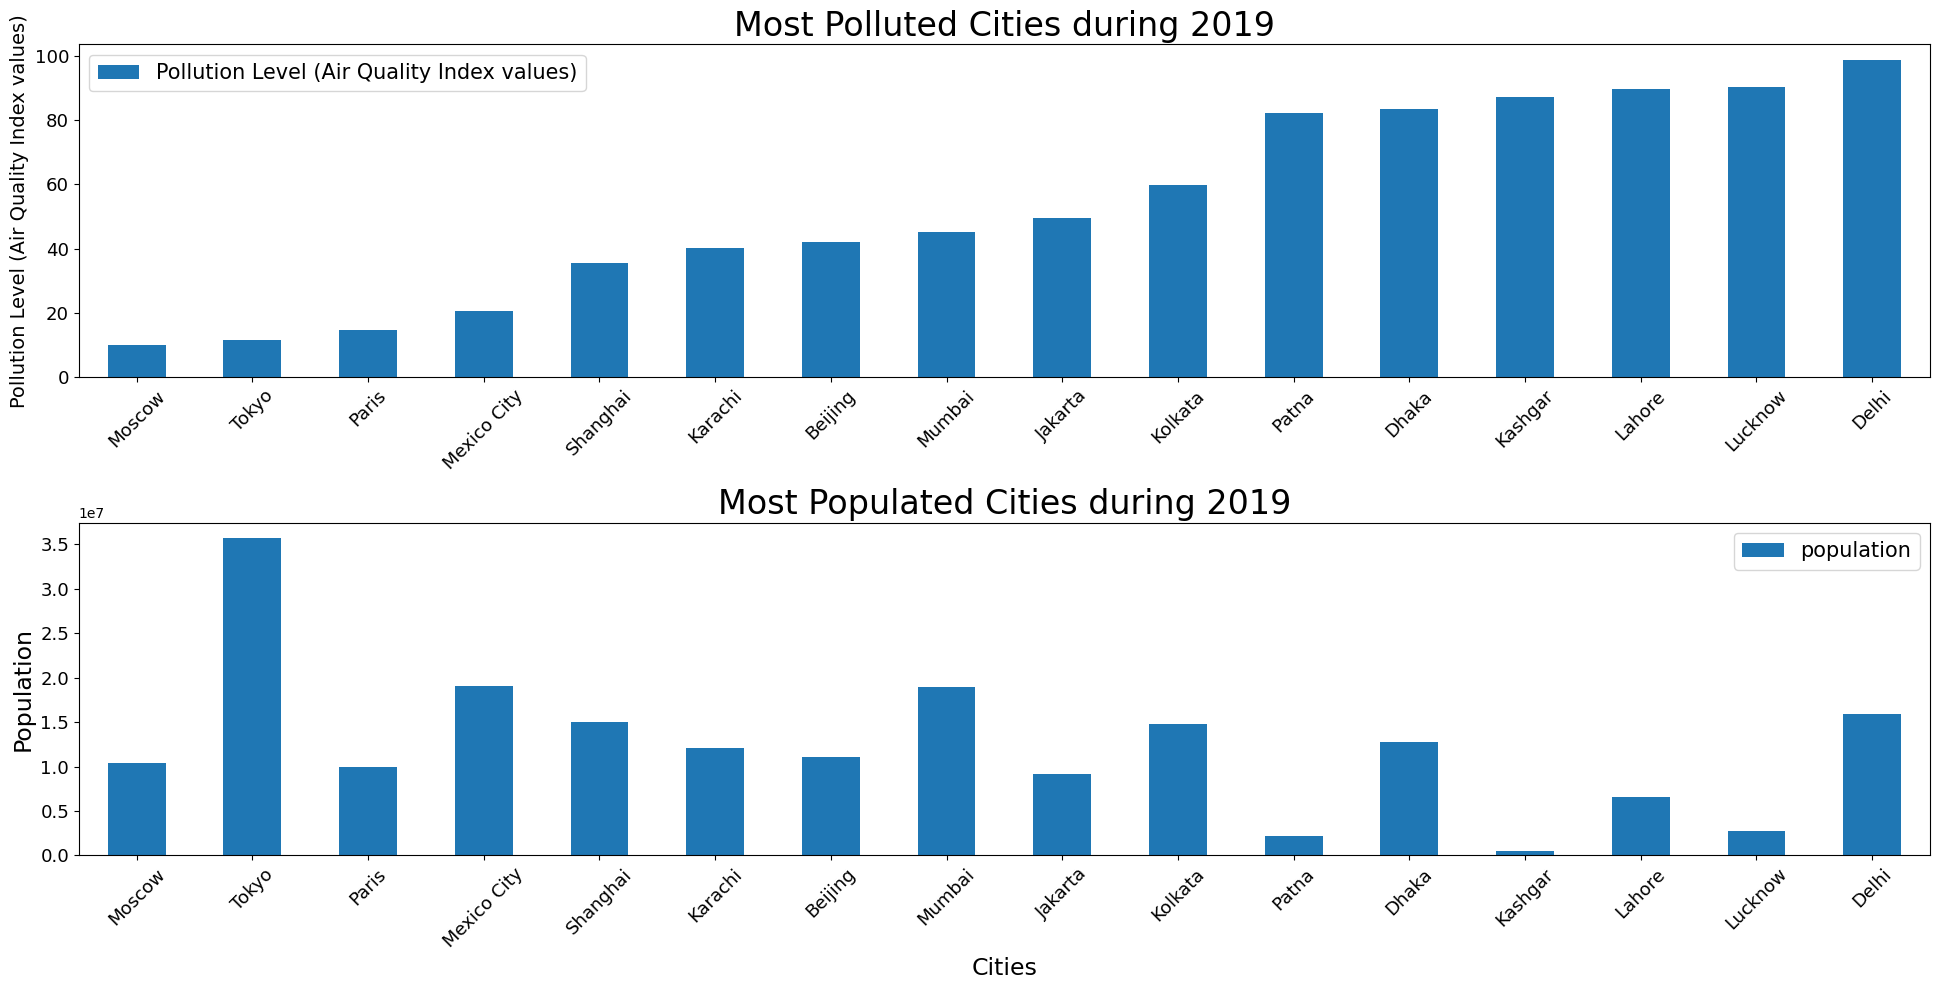

In [1597]:
#Visual 1 - FILL IN
df_city_population_and_pollution_2019_cols = ['Pollution Level (Air Quality Index values)', 'population'] # series to hold names of columns containing numbers in "df_city_population_and_pollution_2019" dataset
for column in df_city_population_and_pollution_2019_cols: 
    merged_df_city_population_and_pollution_2019[column] = merged_df_city_population_and_pollution_2019[column].astype(np.float64) # converts 'Pollution Level (Air Quality Index values)' and 'population' columns from "object" to "float64"

most_pollution_df_city_population_and_pollution_2019 = merged_df_city_population_and_pollution_2019[merged_df_city_population_and_pollution_2019['Pollution Level (Air Quality Index values)'] >= 70] # creates dataset with pollution levels greater than or equal to 70 from "merged_df_city_population_and_pollution_2019" dataset
most_population_df_city_population_and_pollution_2019 = merged_df_city_population_and_pollution_2019[merged_df_city_population_and_pollution_2019['population'] >= 9000000] # creates dataset with populations greater than or equal to 9000000 from "merged_df_city_population_and_pollution_2019" dataset
merged_df_highest_city_population_and_pollution_2019 = pd.merge(most_pollution_df_city_population_and_pollution_2019, most_population_df_city_population_and_pollution_2019, how='outer', on=['Pollution Level (Air Quality Index values)', 'city', 'country', 'population']) # merges first & second datasets by 'Pollution Level (Air Quality Index values)', 'city', 'country', and 'population' columns in both datasets (Only Merge That Does NOT Cause Error)

fig, axes = plt.subplots(2, 1, figsize=(19.5,10)) # creates subplots; 2 rows & 1 column; substitutes "subplots=True" & "test[1].legend(loc=2)" ("subplots=True" splits graph into separate graphs for each column) ("test[1].legend(loc=2)" defines locations of each subplot) ("figsize=(19.5,10)" defines all graph sizes in subplots)

merged_df_highest_city_population_and_pollution_2019.plot(x='city', y='Pollution Level (Air Quality Index values)', kind='bar', ax=axes[0], title='Most Polluted Cities during 2019', rot=45, fontsize=13) # creates & displays first graph for "merged_df_highest_city_population_and_pollution_2019" (MUST INCLUDE "ax=axes[0]" In Subplot Or ERROR WILL OCCUR) ("rot=45" ensures x-axis labels are slanted, so ALL Labels can be read)

axes[0].title.set_size(24) # defines title size of first bar graph
axes[0].set_xlabel('', fontsize=17) # adds x-axis label to first bar graph
axes[0].set_ylabel('Pollution Level (Air Quality Index values)', fontsize=14) # adds y-axis label to first bar graph
axes[0].legend(fontsize=15) # specifies legend size of first bar graph

merged_df_highest_city_population_and_pollution_2019.plot(x='city', y='population', kind='bar', ax=axes[1], title='Most Populated Cities during 2019', rot=45, fontsize=13) # creates & displays second graph for "merged_df_highest_city_population_and_pollution_2019" (MUST INCLUDE "ax=axes[0]" In Subplot Or ERROR WILL OCCUR) ("rot=45" ensures x-axis labels are slanted, so ALL Labels can be read) (MUST INCLUDE "ax=axes[1]" In Subplot Or ERROR WILL OCCUR) ("rot=45" ensures x-axis labels are slanted, so ALL Labels can be read) 

axes[1].title.set_size(24) # defines title size of second bar graph
axes[1].set_xlabel('Cities', fontsize=17) # adds x-axis label to second bar graph
axes[1].set_ylabel('Population', fontsize=17) # adds y-axis label to second bar graph
axes[1].legend(fontsize=15) # specifies legend size of second bar graph

plt.tight_layout() # adjust layout
plt.show() # shows plots

***Answer to research question:*** The first visual displays two graphs of the most **populated** and **polluted** cites. The first graph shows cities with **pollution** levels _greater than or equal to 70_, which are the most **polluted** cities and their pollution levels. The second graph shows cities with **populations** _greater than or equal to 9,000,000_, which are the most **populated** cities and their populations. **_These graphs show that population is a valid factor of pollution because the graphs show that the most polluted cities have the largest populations, despite the most populated cities not having the most pollution._**

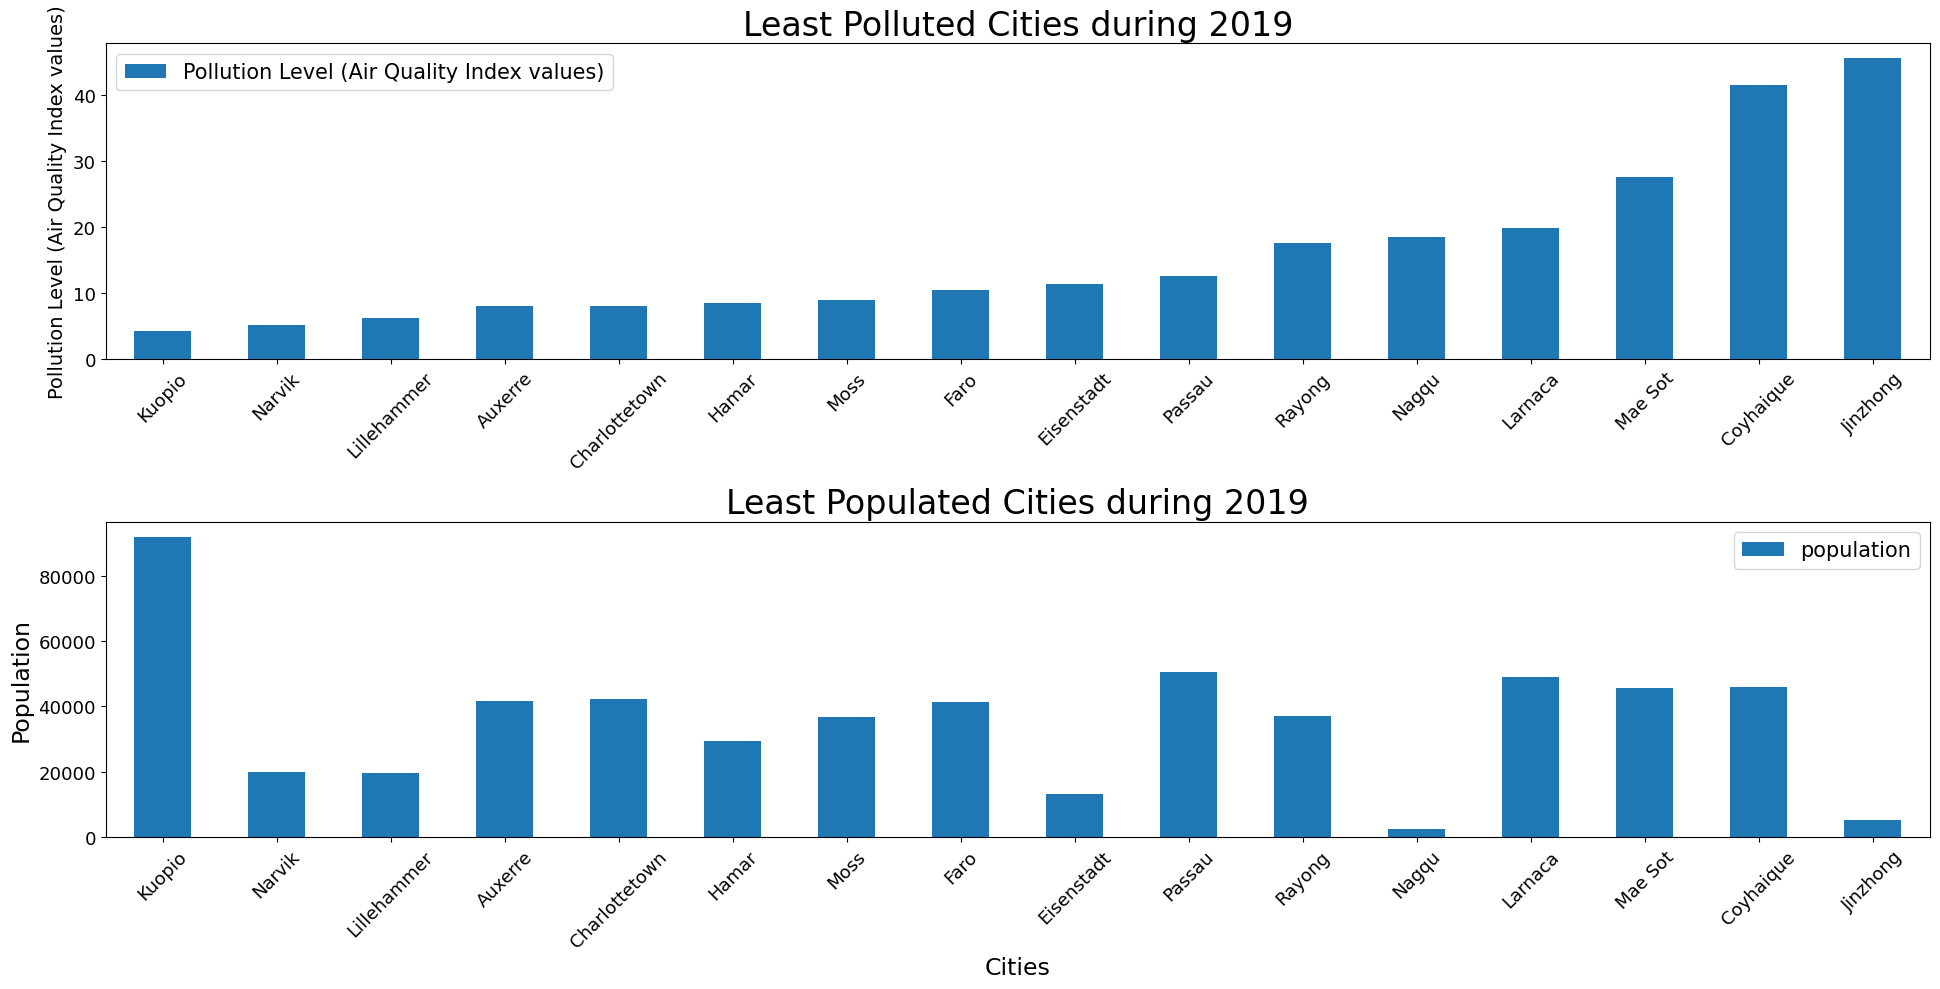

In [1596]:
#Visual 2 - FILL IN
df_city_population_and_pollution_2019_cols = ['Pollution Level (Air Quality Index values)', 'population'] # series to hold names of columns containing numbers in "df_city_population_and_pollution_2019" dataset
for column in df_city_population_and_pollution_2019_cols: 
    merged_df_city_population_and_pollution_2019[column] = merged_df_city_population_and_pollution_2019[column].astype(np.float64) # converts 'Pollution Level (Air Quality Index values)' and 'population' columns from "object" to "float64"

least_pollution_df_city_population_and_pollution_2019 = merged_df_city_population_and_pollution_2019[merged_df_city_population_and_pollution_2019['Pollution Level (Air Quality Index values)'] <= 4.35] # creates dataset with pollution levels less than or equal to 4.35 from "merged_df_city_population_and_pollution_2019" dataset
least_population_df_city_population_and_pollution_2019 = merged_df_city_population_and_pollution_2019[merged_df_city_population_and_pollution_2019['population'] <= 56000] # creates dataset with populations less than or equal to 56000 from "merged_df_city_population_and_pollution_2019" dataset
merged_df_lowest_city_population_and_pollution_2019 = pd.merge(least_pollution_df_city_population_and_pollution_2019, least_population_df_city_population_and_pollution_2019, how='outer', on=['Pollution Level (Air Quality Index values)', 'city', 'country', 'population']) # merges first & second datasets by 'Pollution Level (Air Quality Index values)', 'city', 'country', and 'population' columns in both datasets (Only Merge That Does NOT Cause Error)

fig, axes = plt.subplots(2, 1, figsize=(19.5,10)) # creates subplots; 2 rows & 1 column; substitutes "subplots=True" & "test[1].legend(loc=2)" ("subplots=True" splits graph into separate graphs for each column) ("test[1].legend(loc=2)" defines locations of each subplot) ("figsize=(19.5,10)" defines all graph sizes in subplots)

merged_df_lowest_city_population_and_pollution_2019.plot(x='city', y='Pollution Level (Air Quality Index values)', kind='bar', ax=axes[0], title='Least Polluted Cities during 2019', rot=45, fontsize=13) # creates & displays first graph for "merged_df_lowest_city_population_and_pollution_2019" (MUST INCLUDE "ax=axes[0]" In Subplot Or ERROR WILL OCCUR) ("rot=45" ensures x-axis labels are slanted, so ALL Labels can be read)

axes[0].title.set_size(24) # defines title size of first bar graph
axes[0].set_xlabel('', fontsize=17) # adds x-axis label to first bar graph
axes[0].set_ylabel('Pollution Level (Air Quality Index values)', fontsize=14) # adds y-axis label to first bar graph
axes[0].legend(fontsize=15) # specifies legend size of first bar graph

merged_df_lowest_city_population_and_pollution_2019.plot(x='city', y='population', kind='bar', ax=axes[1], title='Least Populated Cities during 2019', rot=45, fontsize=13) # creates & displays second graph for "merged_df_lowest_city_population_and_pollution_2019" (MUST INCLUDE "ax=axes[1]" In Subplot Or ERROR WILL OCCUR) ("rot=45" ensures x-axis labels are slanted, so ALL Labels can be read)

axes[1].title.set_size(24) # defines title size of second bar graph
axes[1].set_xlabel('Cities', fontsize=17) # adds x-axis label to second bar graph
axes[1].set_ylabel('Population', fontsize=17) # adds y-axis label to second bar graph
axes[1].legend(fontsize=15) # specifies legend size of second bar graph

plt.tight_layout() # adjust layout
plt.show() # shows plots

***Answer to research question:*** The first visual displays two graphs of the least **populated** and **polluted** cites. The first graph shows cities with **pollution** levels _less than or equal to 4.35_, which are the least **polluted** cities and their pollution levels. The second graph shows cities with **populations** _less than or equal to 56000_, which are the least **populated** cities and their populations. **_These graphs show that population is a valid factor of pollution because the graphs show that the least polluted cities have the smallest populations, despite the least populated cities not having the least pollution._**

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

***Answer:*** One method that I would have liked to use to gather the data from one of the datasets is **"_extracting data from a SQL database_"**. Since I have a computer application called **pgAdmin 4** that has a rational database, I would have liked to store and update my data using **pgAdmin 4**. However, since I have never updated a dataset in **pgAdmin 4** before, learning how to update a dataset in **pgAdmin 4** would increase the amount of time needed to finish the project.